In [2]:
import os
os.chdir('..')

In [3]:
import pandas as pd

from models import LPMC_Full
from models import LPMC_DrivingCost
from models import LPMC_RemoveRest

import matplotlib.pyplot as plt
import seaborn as sns

import time

import numpy as np

sns.set(font_scale=1.5)

data_folder = '../data/'
figures_folder = '../figures/'

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [31]:
model = LPMC_DrivingCost(data_folder, '12_13_14.csv')

In [32]:
df = model.biogeme.database.data

In [33]:
n = len(model.biogeme.database.data)
steps = 19

delta = int(n/steps)

In [34]:
sizes = np.array(range(delta, n, delta))
sizes[-1] = n

In [35]:
tot_rep1 = 2
tot_rep2 = 5

tot_rep = tot_rep1*tot_rep2

In [36]:
times = []
for size in sizes:
    print("Start for size {}. Total of {} iterations.".format(size, tot_rep))
    tmp = []
    count = 0
    for rep1 in range(tot_rep1):
        sample = df.sample(n=size, replace=False)
        
        model.biogeme.theC.setData(sample)
        
        for rep2 in range(tot_rep2):
            
            print("  Iter {}/{}".format(count+1, tot_rep))
                        
            start = time.time()
            model.biogeme.calculateLikelihoodAndDerivatives(model.x0, hessian=True)
            stop = time.time()
            
            count += 1

            tmp.append(stop-start)
            
    print("  Avg time obtained: {:.3f}".format(np.mean(tmp)))
    times.append(tmp)

Start for size 4267. Total of 10 iterations.
  Iter 1/10
  Iter 2/10
  Iter 3/10
  Iter 4/10
  Iter 5/10
  Iter 6/10
  Iter 7/10
  Iter 8/10
  Iter 9/10
  Iter 10/10
  Avg time obtained: 0.036
Start for size 8534. Total of 10 iterations.
  Iter 1/10
  Iter 2/10
  Iter 3/10
  Iter 4/10
  Iter 5/10
  Iter 6/10
  Iter 7/10
  Iter 8/10
  Iter 9/10
  Iter 10/10
  Avg time obtained: 0.070
Start for size 12801. Total of 10 iterations.
  Iter 1/10
  Iter 2/10
  Iter 3/10
  Iter 4/10
  Iter 5/10
  Iter 6/10
  Iter 7/10
  Iter 8/10
  Iter 9/10
  Iter 10/10
  Avg time obtained: 0.130
Start for size 17068. Total of 10 iterations.
  Iter 1/10
  Iter 2/10
  Iter 3/10
  Iter 4/10
  Iter 5/10
  Iter 6/10
  Iter 7/10
  Iter 8/10
  Iter 9/10
  Iter 10/10
  Avg time obtained: 0.153
Start for size 21335. Total of 10 iterations.
  Iter 1/10
  Iter 2/10
  Iter 3/10
  Iter 4/10
  Iter 5/10
  Iter 6/10
  Iter 7/10
  Iter 8/10
  Iter 9/10
  Iter 10/10
  Avg time obtained: 0.228
Start for size 25602. Total of 1

Text(0.5, 0, 'Batch size')

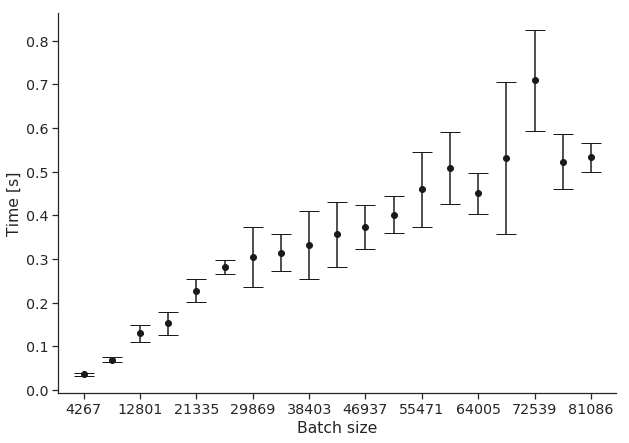

In [37]:
plt.figure(figsize=(10, 7), frameon=False)

sns.set_context("paper")
sns.set(font_scale = 1.3)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

y = []
yerr = []

for val in times:
    y.append(np.mean(val))
    yerr.append(np.std(val))
    
plt.errorbar(sizes, y, yerr, fmt='o', capsize=10, color='k')

plt.xticks(sizes[::2])

plt.ylabel('Time [s]')
plt.xlabel('Batch size')

Text(0.5, 0, 'Batch size')

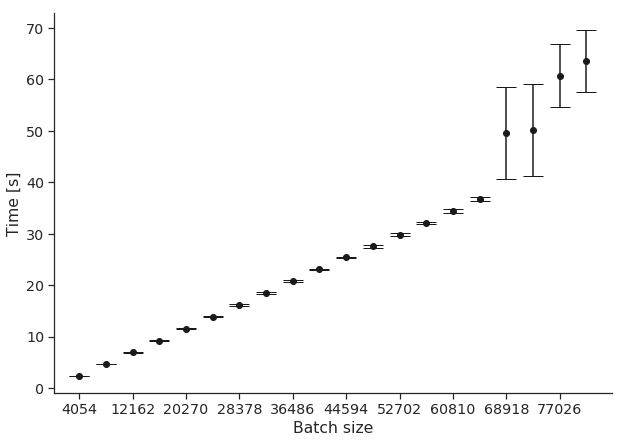

In [30]:
plt.figure(figsize=(10, 7), frameon=False)

sns.set_context("paper")
sns.set(font_scale = 1.3)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

y = []
yerr = []

for val in times:
    y.append(np.mean(val))
    yerr.append(np.std(val))
    
plt.errorbar(sizes, y, yerr, fmt='o', capsize=10, color='k')

plt.xticks(sizes[::2])

plt.ylabel('Time [s]')
plt.xlabel('Batch size')